# Financial Inclusion In Africa
The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

### ML Workflow:

#### Prepare Data
- Import
- Exploratory Data Analysis
- Resample

#### Build Model
- Baseline
- Iterate
- Evaluate

#### Communicate Results
- Feature Importances and Ethical Considerations
    

## Prepare Data

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
data = pd.read_csv("Train.csv")

print(data.shape)
print(data.info())
data.head()

(23524, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Exploratory Data Analysis

### Bank Account Access (Target Vector)

No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64


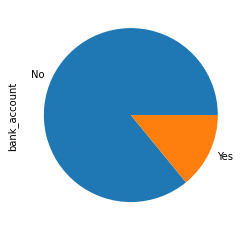

In [3]:
bank = data["bank_account"].value_counts(normalize=True)
print(bank)
bank.plot(
    kind="pie"
    );

The data is **Imbalanced** since the proportion of the test group that has access to a bank account is significantly lower than the ones who do not have access to a bank account. (perform over sampling)

### Country

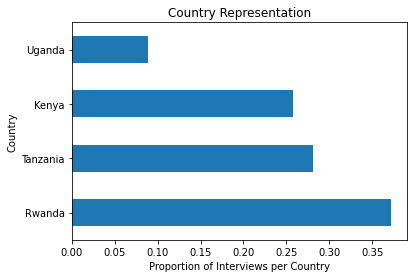

In [4]:
countries = data["country"].value_counts(normalize=True)
countries.plot(kind="barh", title="Country Representation")
plt.ylabel("Country")
plt.xlabel("Proportion of Interviews per Country");

We are able to see that a majority of intervies happened in Rwanda, with Uganda having the lowest representation.

### Taking a closer look at the 'uniqueid' column
While assesing the data, we noted that the 'uniqueid' colunm contains dulicate values: Only 37 percent of the values are truly unique

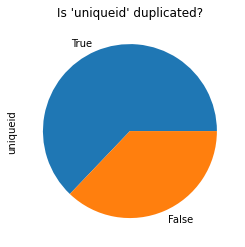

In [5]:
unique_id = data["uniqueid"].duplicated().value_counts(normalize=True)
unique_id.plot(kind="pie", title="Is 'uniqueid' duplicated?");

Since the 'uniqueid' column does not affect analysis. It would be worth checking if the rest of the data is similar along rows with duplicated 'uniqueid'

In [6]:
data[data["uniqueid"] == "uniqueid_1"]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7,18,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,6,22,Female,Child,Divorced/Seperated,Secondary education,No Income
21423,Uganda,2018,uniqueid_1,No,Rural,No,5,32,Female,Head of Household,Divorced/Seperated,Primary education,Other Income


We satisfactorily conclude that unique IDs are same for different countries as shown above

### Distribution of Ages

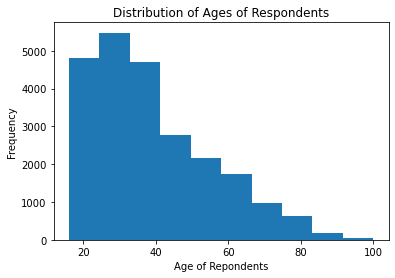

In [7]:
plt.hist(data["age_of_respondent"])
plt.title("Distribution of Ages of Respondents")
plt.xlabel("Age of Repondents")
plt.ylabel("Frequency");

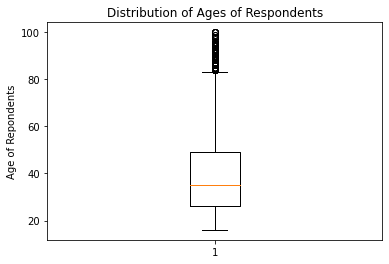

In [8]:
plt.boxplot(data["age_of_respondent"])
plt.title("Distribution of Ages of Respondents")
plt.ylabel("Age of Repondents");

The data is skewed. It might help to trim it to include respondents who are between 16 and 80 years old

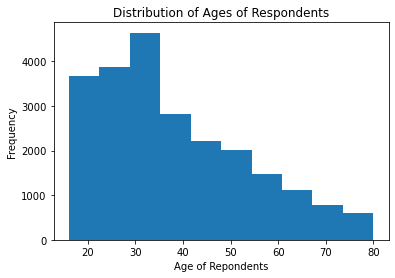

In [9]:
new_data = data[data["age_of_respondent"].between(16, 80)]
plt.hist(new_data["age_of_respondent"])
plt.title("Distribution of Ages of Respondents")
plt.xlabel("Age of Repondents")
plt.ylabel("Frequency");

The data remains skewed even after treaming it. The majority of the respondents are in the range of 16 and 40 years old
(We shall consider this distribution in picking a model that is not affected by skewness)

### Average Household Size by Country

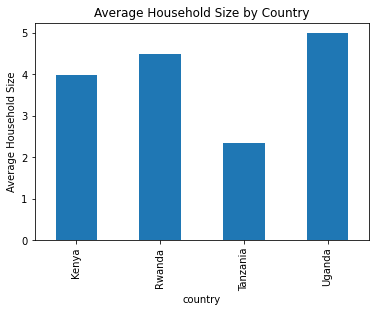

In [10]:
hh_size_avg = data.groupby(data["country"])["household_size"].mean()
hh_size_avg.plot(
    kind='bar',
    title="Average Household Size by Country",
    ylabel="Average Household Size",
    
);

### Relationship with Household Head

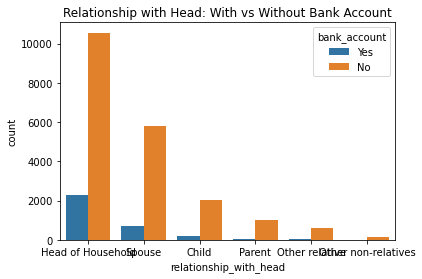

In [11]:
hhhead_dict = data["relationship_with_head"].value_counts().to_dict()

sns.countplot(
    x="relationship_with_head",
    hue="bank_account",
    order=hhhead_dict,
    data=data
)
plt.title("Relationship with Head: With vs Without Bank Account");

### Cell Phone Access

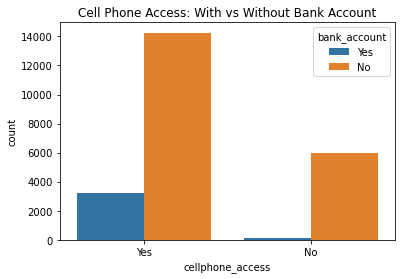

In [12]:
sns.countplot(
    x="cellphone_access",
    hue="bank_account",
    data=data
)
plt.title("Cell Phone Access: With vs Without Bank Account");

This raw data visualization shows a high relationship between owning a mobile phone and having a bank account. Almost everyone who does not own a mobile phone, does not have a bank account.

### Education Level

In [13]:
el_dict = data["education_level"].value_counts().to_dict()
elevel_dict = {
    'No formal education': 4515,
    'Primary education': 12791,
    'Tertiary education': 1157,
    'Vocational/Specialised training': 803,
    'Other/Dont know/RTA': 35
}
elevel_dict

{'No formal education': 4515,
 'Primary education': 12791,
 'Tertiary education': 1157,
 'Vocational/Specialised training': 803,
 'Other/Dont know/RTA': 35}

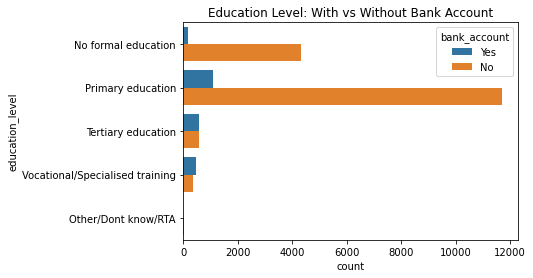

In [14]:
sns.countplot(
    y="education_level",
    hue="bank_account",
    order=elevel_dict,
    data=data
)
plt.title("Education Level: With vs Without Bank Account");

In [15]:
mask = data["bank_account"] == "Yes"
dataY = data[mask]
el_dictY = dataY["education_level"].value_counts().to_dict()
print(el_dict)
el_dictY

{'Primary education': 12791, 'No formal education': 4515, 'Secondary education': 4223, 'Tertiary education': 1157, 'Vocational/Specialised training': 803, 'Other/Dont know/RTA': 35}


{'Primary education': 1093,
 'Secondary education': 983,
 'Tertiary education': 591,
 'Vocational/Specialised training': 458,
 'No formal education': 176,
 'Other/Dont know/RTA': 11}

In [16]:
proportion = {}
for key, value in el_dict.items():
    for keyY, valueY in el_dictY.items():
        if key == keyY:
            proportion[key] = valueY / (value - valueY)

proportion

{'Primary education': 0.09343477517524364,
 'No formal education': 0.04056234155335331,
 'Secondary education': 0.3033950617283951,
 'Tertiary education': 1.0441696113074206,
 'Vocational/Specialised training': 1.327536231884058,
 'Other/Dont know/RTA': 0.4583333333333333}

Text(0.5, 1.0, 'Proportion of Bank Account with Education Level')

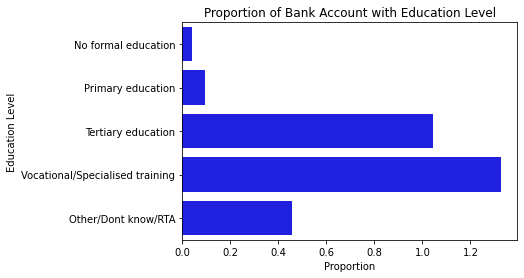

In [17]:
categories = list(proportion.keys())
values = list(proportion.values())

sns.barplot(y=categories, x=values, order=elevel_dict, color='blue')
plt.xlabel("Proportion")
plt.ylabel("Education Level")
plt.title("Proportion of Bank Account with Education Level")

This visualization shows a strong relatioship between the level of education and bank account. **The proportion of persons with a bank account increases with the level of education**

### Job Type

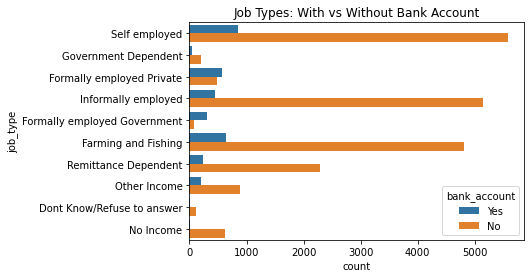

In [18]:
sns.countplot(
    y="job_type",
    hue="bank_account",
    data=data
)
plt.title("Job Types: With vs Without Bank Account");

**More formally employed people have a bank account**

### Correlation

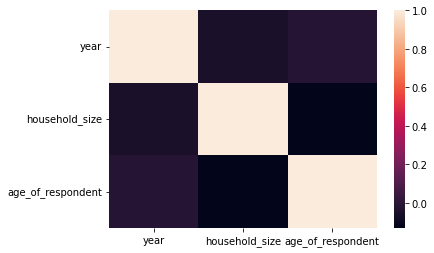

In [19]:
# plotting a correlation heat map (Numerical values only)
corr = data.drop(columns="bank_account").corr()
sns.heatmap(corr);

There is no correlation in pur numerical values. We will check for correlation of all the variables in the next part after encoding